# RIDGE REGRESSION (SQRT Transformed)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('clean_and_encoded_df.csv')

# Aplicar logaritmo a la variable 'Annual_salary'
df['Annual_salary'] = np.sqrt(df['Annual_salary'])

baseline_cols = ["Country", "Job_type", "Education", "Company_size", "Age", "Work_experience", "Annual_salary"]

# Add Job_title columns to the baseline_cols list
Job_title = ['Developer, game or graphics', 'Blockchain', 'Developer, QA or test', 'Developer, back-end', 'Student', 
             'Project manager', 'Data or business analyst', 'Cloud infrastructure engineer', 'Engineer, data', 
             'Educator', 'Developer, desktop or enterprise applications', 'Developer, front-end', 'Designer', 
             'Security professional', 'Developer, embedded applications or devices', 'Product manager', 'Developer, mobile', 
             'Developer, full-stack', 'Scientist', 'Database administrator', 'Academic researcher', 'Senior Executive (C-Suite, VP, etc.)', 
             'Marketing or sales professional', 'System administrator', 'Data scientist or machine learning specialist', 
             'Engineer, site reliability', 'DevOps specialist', 'Engineering manager']

baseline_cols.extend(Job_title)

# Iterate through the columns and keep only those containing the specified keywords
columns_to_keep = [col for col in df.columns if any(keyword in col for keyword in baseline_cols)]

# Filter the DataFrame, keeping only the selected columns
baseline_df = df[columns_to_keep]


baseline_df.head()

,Education,Company_size,Age,Job_type_Full-time employed,Job_type_Independent contractor / Freelancer / Self-employed,Job_type_Other,Job_type_Part-time employed,Country_Andorra,Country_Angola,Country_Argentina,...,Marketing or sales professional,Product manager,Project manager,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator,Work_experience,Annual_salary
0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,4.8,200.511845
1,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,6.4,229.715041
2,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,6.0,232.432786
3,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,7.8,268.780580
4,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,11.4,250.639183


In [3]:
base_X = baseline_df.drop('Annual_salary', axis=1)
y = baseline_df['Annual_salary']
print(base_X.shape)
print(y.shape)

(2805, 138)
(2805,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(base_X, y, test_size=0.2, random_state=42)
y_train = y_train.reset_index(drop=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
'''# Define the distribution for alpha values
alphas = np.logspace(-4, 4, num=100)

# Instantiate the Ridge model and RandomizedSearchCV
ridge = Ridge()
random_search = RandomizedSearchCV(ridge, param_distributions={'alpha': alphas}, n_iter=20,
                                   scoring='r2', cv=5, random_state=42)

# Fit the RandomizedSearchCV object
random_search.fit(X_train_scaled, y_train)

# Get the best alpha value and the corresponding R2 score
best_alpha = random_search.best_params_['alpha']
best_r2_score = random_search.best_score_

print(f"Best alpha value: {best_alpha}")

# Train a Ridge model with the best alpha value and evaluate its performance on the test set
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)

y_test_preds = best_ridge.predict(X_test_scaled)
# Reverse sqrt transformation
test_preds_sqrd = y_test_preds**2 
test_targets_sqrd = y_test**2 

r2_test = r2_score(test_targets_sqrd, test_preds_sqrd)
rmse_test = np.sqrt(mean_squared_error(test_targets_sqrd, test_preds_sqrd))
mae_test = mean_absolute_error(test_targets_sqrd, test_preds_sqrd)

print(f"Test R2 (Ridge): {r2_test:.3f}")
print(f"Test RMSE (Ridge): {rmse_test:.3f}")
print(f"Test MAE (Ridge): {mae_test:.3f}")'''

'# Define the distribution for alpha values\nalphas = np.logspace(-4, 4, num=100)\n\n# Instantiate the Ridge model and RandomizedSearchCV\nridge = Ridge()\nrandom_search = RandomizedSearchCV(ridge, param_distributions={\'alpha\': alphas}, n_iter=20,\n                                   scoring=\'r2\', cv=5, random_state=42)\n\n# Fit the RandomizedSearchCV object\nrandom_search.fit(X_train_scaled, y_train)\n\n# Get the best alpha value and the corresponding R2 score\nbest_alpha = random_search.best_params_[\'alpha\']\nbest_r2_score = random_search.best_score_\n\nprint(f"Best alpha value: {best_alpha}")\n\n# Train a Ridge model with the best alpha value and evaluate its performance on the test set\nbest_ridge = Ridge(alpha=best_alpha)\nbest_ridge.fit(X_train_scaled, y_train)\n\ny_test_preds = best_ridge.predict(X_test_scaled)\n# Reverse sqrt transformation\ntest_preds_sqrd = y_test_preds**2 \ntest_targets_sqrd = y_test**2 \n\nr2_test = r2_score(test_targets_sqrd, test_preds_sqrd)\nrmse_te

## Hyperparameter tunning

- The more folds, the better results (however, set to 5 since 15 is not normal)
- alpha = 250 best performance


In [6]:
k = 5
num_val_samples = len(X_train_scaled) // k
all_scores_r2 = []
all_scores_adjusted_r2 = []
all_scores_rmse = []
all_scores_mae = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [X_train_scaled[:i * num_val_samples],
         X_train_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    model = Ridge(alpha=291)
    model.fit(partial_train_data, partial_train_targets)

    val_preds = model.predict(val_data)
    # Reverse sqrt transformation
    val_preds_sqrd = val_preds**2 
    val_targets_sqrd = val_targets**2 

    r2_val = r2_score(val_targets_sqrd, val_preds_sqrd)
    n = val_data.shape[0]
    p = val_data.shape[1]
    adjusted_r2_val = 1 - (1 - r2_val) * (n - 1) / (n - p - 1)
    rmse_val = np.sqrt(mean_squared_error(val_targets_sqrd, val_preds_sqrd))
    mae_val = mean_absolute_error(val_targets_sqrd, val_preds_sqrd)

    all_scores_r2.append(r2_val)
    all_scores_adjusted_r2.append(adjusted_r2_val)
    all_scores_rmse.append(rmse_val)
    all_scores_mae.append(mae_val)


mean_r2 = np.mean(all_scores_r2)
std_r2 = np.std(all_scores_r2)
mean_adjusted_r2 = np.mean(all_scores_adjusted_r2)
std_adjusted_r2 = np.std(all_scores_adjusted_r2)
mean_rmse = np.mean(all_scores_rmse)
std_rmse = np.std(all_scores_rmse)
mean_mae = np.mean(all_scores_mae)
std_mae = np.std(all_scores_mae)

print(f"Average R2 score (Ridge): {mean_r2:.3f} (+/- {std_r2:.3f})")
print(f"Average adjusted R2 score (Ridge): {mean_adjusted_r2:.3f} (+/- {std_adjusted_r2:.3f})")
print(f"Average RMSE score (Ridge): {mean_rmse:.3f} (+/- {std_rmse:.3f})")
print(f"Average MAE score (Ridge): {mean_mae:.3f} (+/- {std_mae:.3f})")



processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
Average R2 score (Ridge): 0.588 (+/- 0.015)
Average adjusted R2 score (Ridge): 0.405 (+/- 0.022)
Average RMSE score (Ridge): 32444.607 (+/- 1467.295)
Average MAE score (Ridge): 23563.354 (+/- 1129.911)


In [7]:
ridge_results_dic = {}
ridge_results_dic['Ridge'] = {'R2': mean_r2,  'Adj R2': mean_adjusted_r2, 'RMSE': mean_rmse, 'MAE': mean_mae}
ridge_results = pd.DataFrame.from_dict(ridge_results_dic, orient='index')
ridge_results

,R2,Adj R2,RMSE,MAE
Ridge,0.588384,0.404555,32444.607268,23563.354496


In [8]:
ridge_results.to_csv('ridge_results.csv', index=True)

In [9]:
# Combinar conjuntos de datos de entrenamiento y validación
X_train_val = np.concatenate((X_train_scaled, val_data), axis=0)
y_train_val = np.concatenate((y_train, val_targets), axis=0)

# Entrenar el modelo utilizando el conjunto de datos combinado
model.fit(X_train_val, y_train_val)

# Hacer predicciones en el conjunto de datos de prueba
y_pred = model.predict(X_test_scaled)

# Revertir la transformación logarítmica
y_pred_sqrd = y_pred**2 #np.exp(y_pred)
y_test_sqrd = y_test**2 #np.exp(y_test)

# Calcular métricas de rendimiento en el conjunto de datos de prueba
r2_test = r2_score(y_test_sqrd, y_pred_sqrd)
rmse_test = np.sqrt(mean_squared_error(y_test_sqrd, y_pred_sqrd))
mae_test = mean_absolute_error(y_test_sqrd, y_pred_sqrd)
n_test = len(X_test_scaled)
p_test = X_train_val.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

print(f"Rendimiento R2 en el conjunto de prueba (MLR): {r2_test:.3f}")
print(f"Rendimiento adjusted R2 en el conjunto de prueba (MLR): {adjusted_r2_test:.3f}")
print(f"Rendimiento RMSE en el conjunto de prueba (MLR): {rmse_test:.3f}")
print(f"Rendimiento MAE en el conjunto de prueba (MLR): {mae_test:.3f}")


Rendimiento R2 en el conjunto de prueba (MLR): 0.597
Rendimiento adjusted R2 en el conjunto de prueba (MLR): 0.465
Rendimiento RMSE en el conjunto de prueba (MLR): 32189.596
Rendimiento MAE en el conjunto de prueba (MLR): 23371.203


In [10]:
test_results_dic = {}
test_results_dic['Ridge'] = {'R2': r2_test,  'Adj R2': adjusted_r2_test, 'RMSE': rmse_test, 'MAE': mae_test}
test_results = pd.DataFrame.from_dict(test_results_dic, orient='index')
test_results

,R2,Adj R2,RMSE,MAE
Ridge,0.597012,0.46523,32189.595552,23371.202723


In [11]:
test_results.to_csv('sqrt_test_ridge_results.csv', index=True)

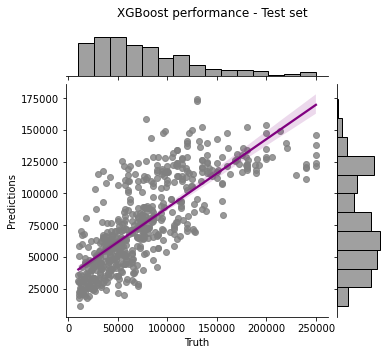

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una cuadrícula de gráficos conjunta y configurar los ejes para los histogramas
g = sns.JointGrid(x=y_test_sqrd, y=y_pred_sqrd, height=5)

# Crear un gráfico de dispersión y ajustar una línea de regresión lineal a los datos
g.plot_joint(sns.regplot, scatter_kws={'color': 'grey'}, line_kws={'color': 'purple'})

# Agregar histogramas en la parte superior y en el lado derecho del gráfico
g.plot_marginals(sns.histplot, kde=False, color='grey')

# Ajustar el espacio entre los subgráficos y mover el título hacia arriba
g.fig.subplots_adjust(top=0.9)

# Agregar título
g.fig.suptitle("XGBoost performance - Test set")

# Etiquetar los ejes
g.ax_joint.set_xlabel("Truth")
g.ax_joint.set_ylabel("Predictions")

plt.show()
